<h1>DATA ANALYSIS FOR GLOBAL TERRORISM</h1>
<h2>Data Analyst: Bernard M. Gabito | BSIT 3A</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset\\globalterrorist.csv', encoding='ISO-8859-1')

In [3]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
for i in df.columns:
    print(i,end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [6]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [7]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/State","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type","gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181256 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [9]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 435
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [10]:
df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casualty"] = df["Killed"] + df["Wounded"]

In [11]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


<h1>Analysis Type: Regional</h1>
<h2>Focus Area: Southeast Asia (1990+, Bombing/Explosion, ≥10 killed)</h2>

<!-- <h1> Visualizing GEOSPATIAL WITH FOLIUM LIbrary </h1> -->

In [12]:
regional = df[df['Region'] == 'Southeast Asia']
regional = regional[regional['Year'] >= 1990]
regional = regional[regional['Attack Type'] == 'Bombing/Explosion']
regional = regional[regional['Killed'] >= 10]

print(f"Filtered dataset size: {len(regional)} rows")

aggre_reg = regional.groupby(['Latitude', 'Longitude']).size().reset_index(name='Incident Count')
aggre_reg['normalized_weight'] = (aggre_reg['Incident Count'] - aggre_reg['Incident Count'].min()) / \
                                 (aggre_reg['Incident Count'].max() - aggre_reg['Incident Count'].min())

heat_data_reg = aggre_reg[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

map_reg = folium.Map(location=[5, 120], zoom_start=5)
HeatMap(heat_data_reg).add_to(map_reg)
map_reg.save('regional_heatmap.html')
map_reg

Filtered dataset size: 44 rows


<h1>------------------------------------------------------------------------------------</h1>

<h1>Analysis Type: Crime Type</h1>
<h2>Focus Area: Armed Assault (2010+, ≥20 killed)</h2>

In [13]:
crime_type = df[df['Attack Type'] == 'Armed Assault']
crime_type = crime_type[crime_type['Year'] >= 2010]
crime_type = crime_type[crime_type['Killed'] >= 20]

print(f"Filtered dataset size: {len(crime_type)} rows")

aggre_crime = crime_type.groupby(['Latitude', 'Longitude']).size().reset_index(name='Incident Count')
aggre_crime['normalized_weight'] = (aggre_crime['Incident Count'] - aggre_crime['Incident Count'].min()) / \
                                    (aggre_crime['Incident Count'].max() - aggre_crime['Incident Count'].min())

heat_data_crime = aggre_crime[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

map_crime = folium.Map(location=[20, 0], zoom_start=2)
HeatMap(heat_data_crime).add_to(map_crime)
map_crime.save('crime_type_analysis.html')
map_crime

Filtered dataset size: 462 rows


<h1>------------------------------------------------------------------------------------</h1>

<h1>Analysis Type: Casualty</h1>
<h2>Focus Area: All incidents with ≥50 killed</h2>

In [14]:
casualty = df[df['Killed'] >= 50]
print(f"Filtered dataset size: {len(casualty)} rows")

aggre_casualty = casualty.groupby(['Latitude', 'Longitude']).size().reset_index(name='Incident Count')
aggre_casualty['normalized_weight'] = (aggre_casualty['Incident Count'] - aggre_casualty['Incident Count'].min()) / \
                                      (aggre_casualty['Incident Count'].max() - aggre_casualty['Incident Count'].min())

heat_data_casualty = aggre_casualty[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

map_casualty = folium.Map(location=[20, 10], zoom_start=2)
HeatMap(heat_data_casualty).add_to(map_casualty)
map_casualty.save('casualty_analysis.html')
map_casualty

Filtered dataset size: 802 rows


<h1>------------------------------------------------------------------------------------</h1>

<h1>Analysis Type: Demographic</h1>
<h2>Focus Area: South Asia, 2005+, Private Citizens & Property</h2>

In [15]:
demo = df[df['Region'] == 'South Asia']
demo = demo[demo['Year'] >= 2005]
demo = demo[demo['Target Type'] == 'Private Citizens & Property']

print(f"Filtered dataset size: {len(demo)} rows")

aggre_demo = demo.groupby(['Latitude', 'Longitude']).size().reset_index(name='Incident Count')
aggre_demo['normalized_weight'] = (aggre_demo['Incident Count'] - aggre_demo['Incident Count'].min()) / \
                                  (aggre_demo['Incident Count'].max() - aggre_demo['Incident Count'].min())

heat_data_demo = aggre_demo[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

map_demo = folium.Map(location=[25, 80], zoom_start=5)
HeatMap(heat_data_demo).add_to(map_demo)
map_demo.save('demographic_analysis.html')
map_demo

Filtered dataset size: 7946 rows


<h1>------------------------------------------------------------------------------------</h1>

<h1>Analysis Type: Target</h1>
<h2>Focus Area: Africa, 2010+, Government targets using Bombing/Explosion</h2>

In [16]:
target = df[df['Region'].str.contains('Africa')]
target = target[target['Year'] >= 2010]
target = target[target['Target Type'] == 'Government (General)']
target = target[target['Attack Type'] == 'Bombing/Explosion']

print(f"Filtered dataset size: {len(target)} rows")

aggre_target = target.groupby(['Latitude', 'Longitude']).size().reset_index(name='Incident Count')
aggre_target['normalized_weight'] = (aggre_target['Incident Count'] - aggre_target['Incident Count'].min()) / \
                                    (aggre_target['Incident Count'].max() - aggre_target['Incident Count'].min())

heat_data_target = aggre_target[['Latitude', 'Longitude', 'normalized_weight']].values.tolist()

map_target = folium.Map(location=[0, 20], zoom_start=3)
HeatMap(heat_data_target).add_to(map_target)
map_target.save('target_analysis.html')
map_target

Filtered dataset size: 1311 rows


<h1>------------------------------------------------------------------------------------</h1>

<h1>Additional Data Analytics</h1>

In [17]:
print(df.columns.tolist())


['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City', 'Latitude', 'Longitude', 'Location', 'Summary', 'Attack Type', 'Target Type', 'Group Name', 'Motive', 'Weapon Type', 'Killed', 'Wounded', 'Add Notes', 'Casualty']


<h1>Number of attacks per year</h1>

In [18]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index()
attacks.columns = ["Year", "Attacks"]
attacks.set_index("Year", inplace=True)
print(attacks)


      Attacks
Year         
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900


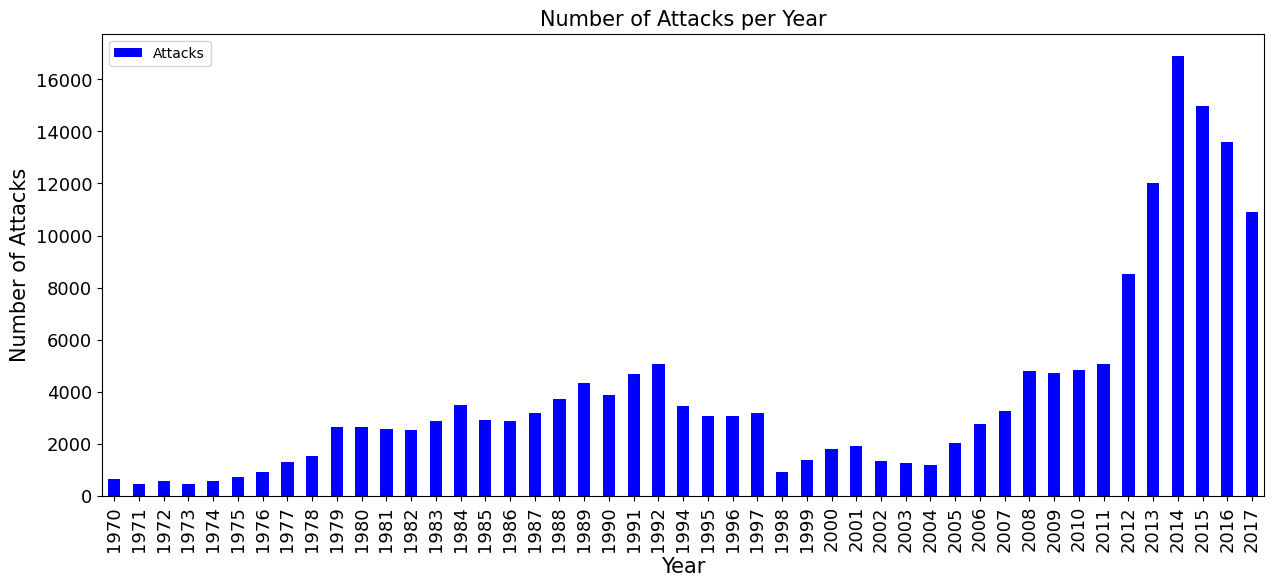

In [19]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Number of Attacks per Year",fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

<h1>Number of casualties per year</h1>

In [20]:
casualties = df[["Year","Casualty"]].groupby("Year").sum()
casualties

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0
1975,1234.0
1976,1430.0
1977,974.0
1978,3059.0


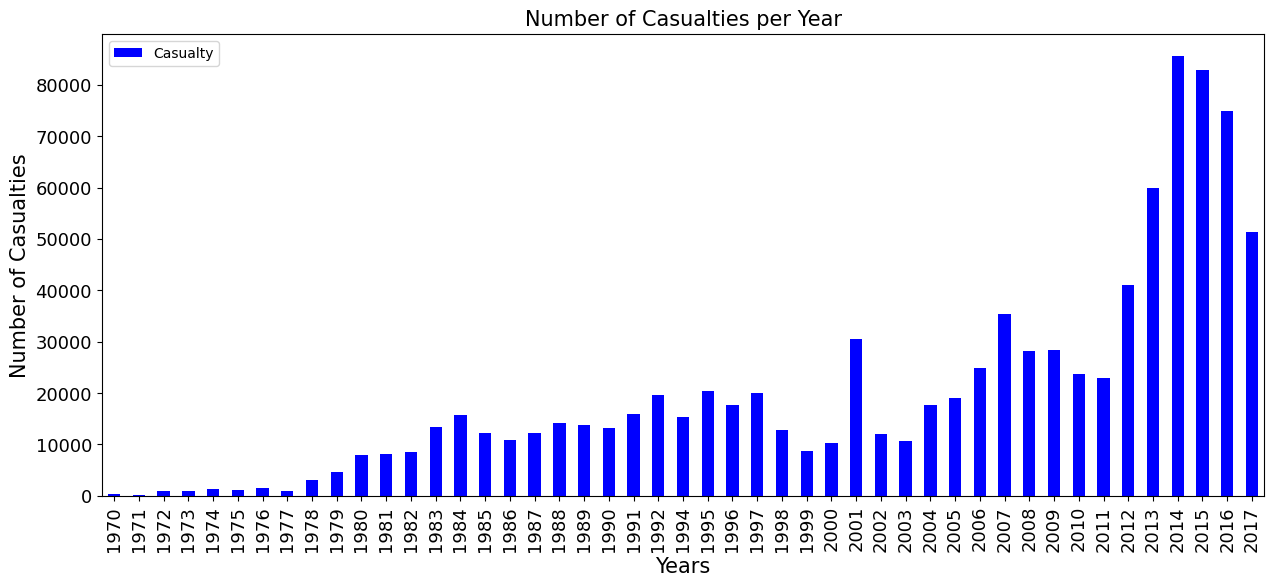

In [21]:
casualties.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Number of Casualties per Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

<h1>Distribution of Terrorist Attacks over Regions</h1>

In [22]:
region = pd.crosstab(df.Year,df.Region)
region

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


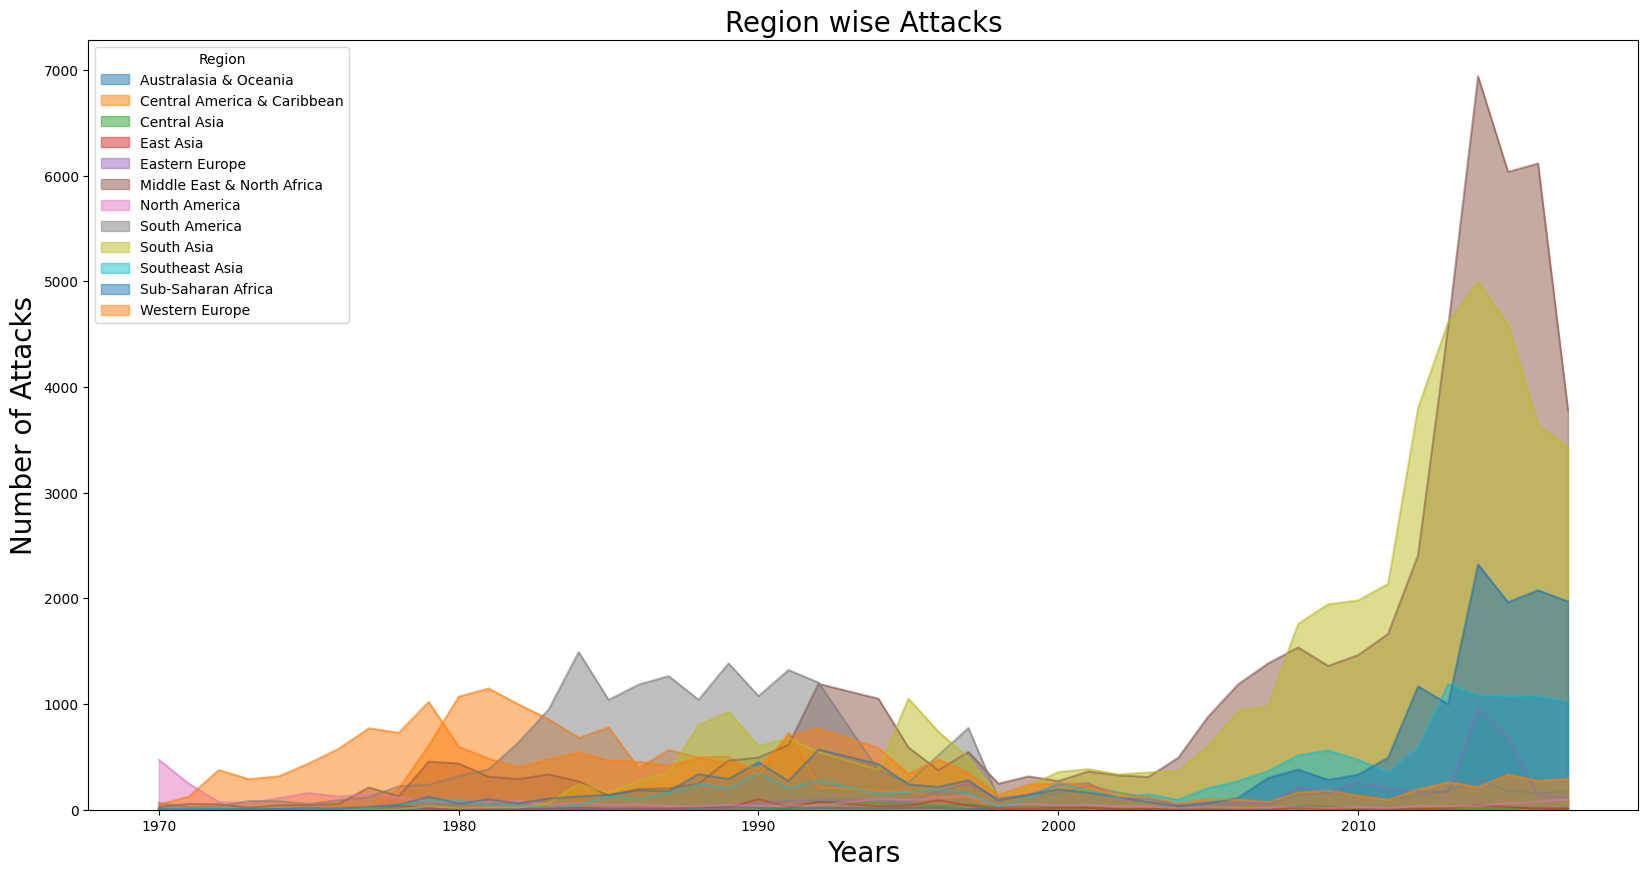

In [23]:
region.plot(kind="area",stacked=False,alpha=0.5,figsize=(20,10))
plt.title("Region wise Attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

<h1>Number of Attacks in each Country (Top 10)</h1>

In [24]:
top10country = df["Country"].value_counts().head(10)
top10country

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

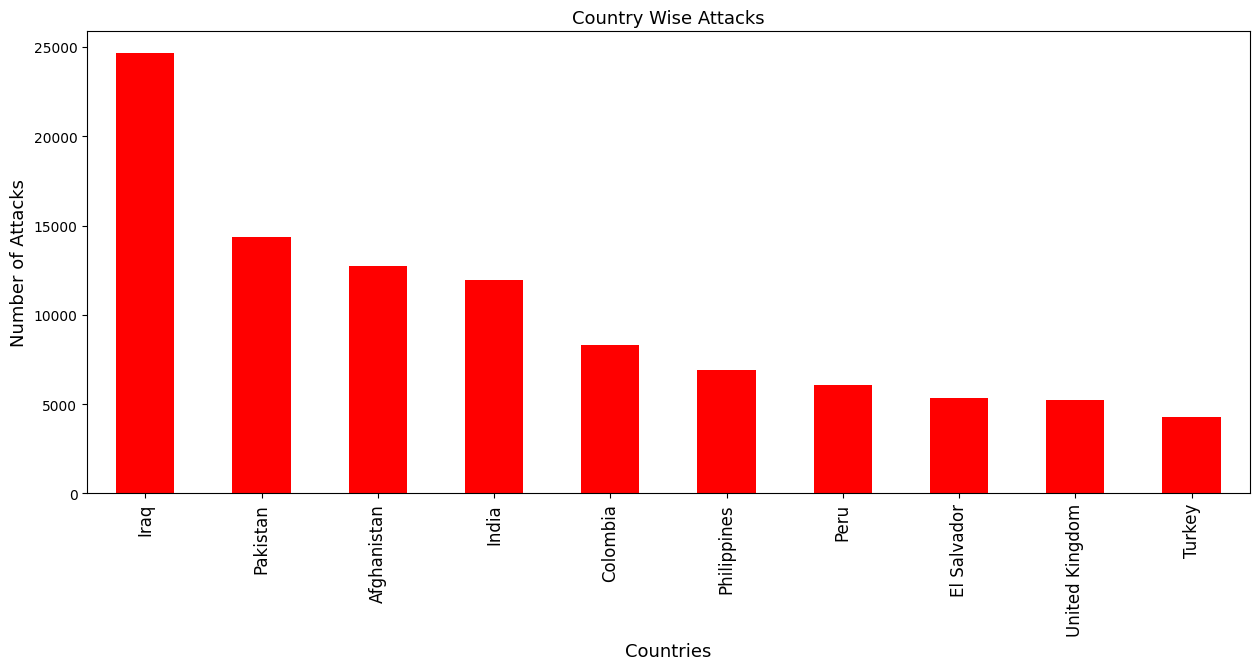

In [25]:
top10country.plot(kind="bar",color="red",figsize=(15,6))
plt.title("Country Wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

<h1>Number of attacks by each Group</h1>

In [26]:
terrorgroup = df["Group Name"].value_counts()[1:10]
terrorgroup

Group Name
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

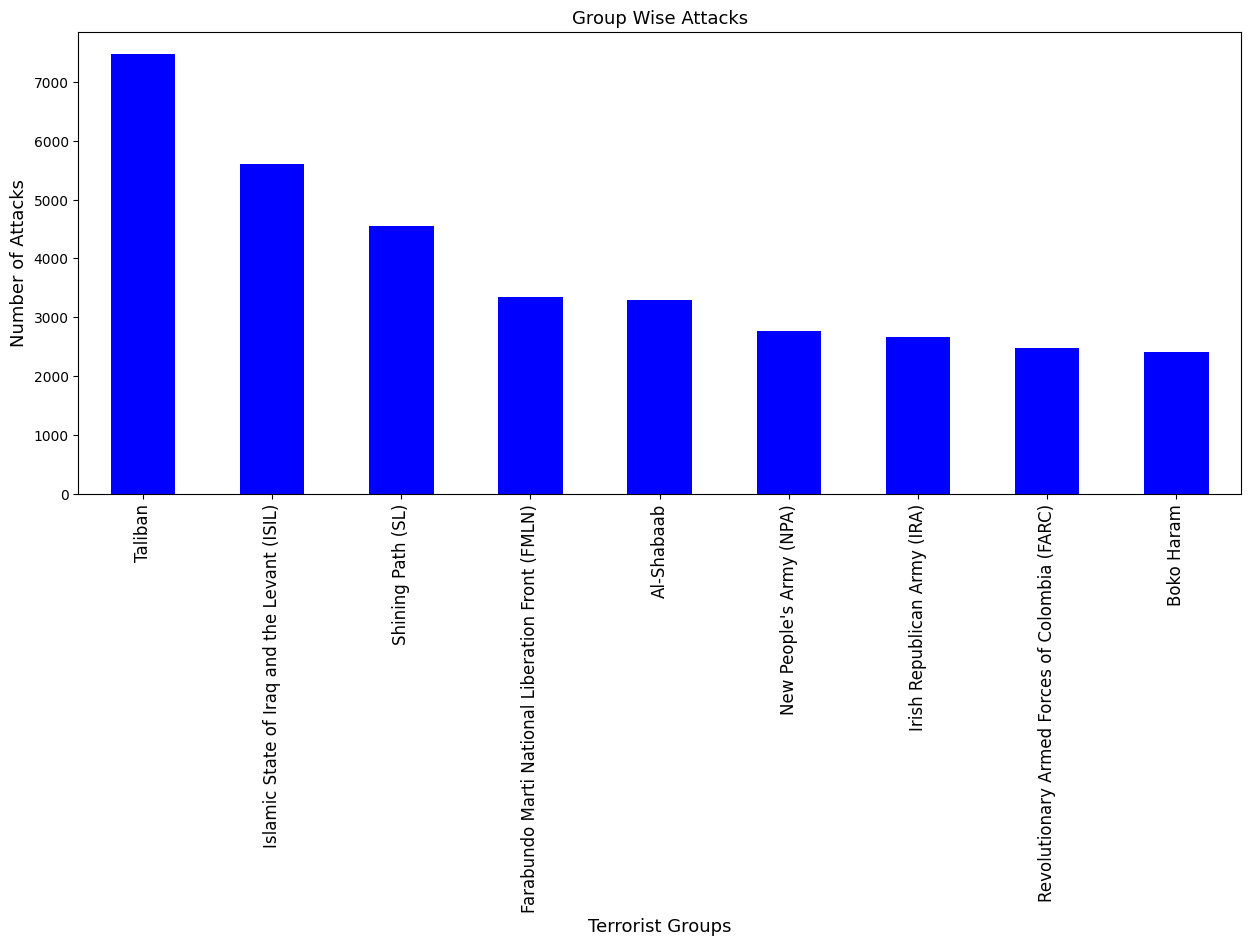

In [27]:
terrorgroup.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Group Wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

<h1>Number of Attacks by each Attack type</h1>

In [28]:
attacktype = df["Attack Type"].value_counts()
attacktype

Attack Type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

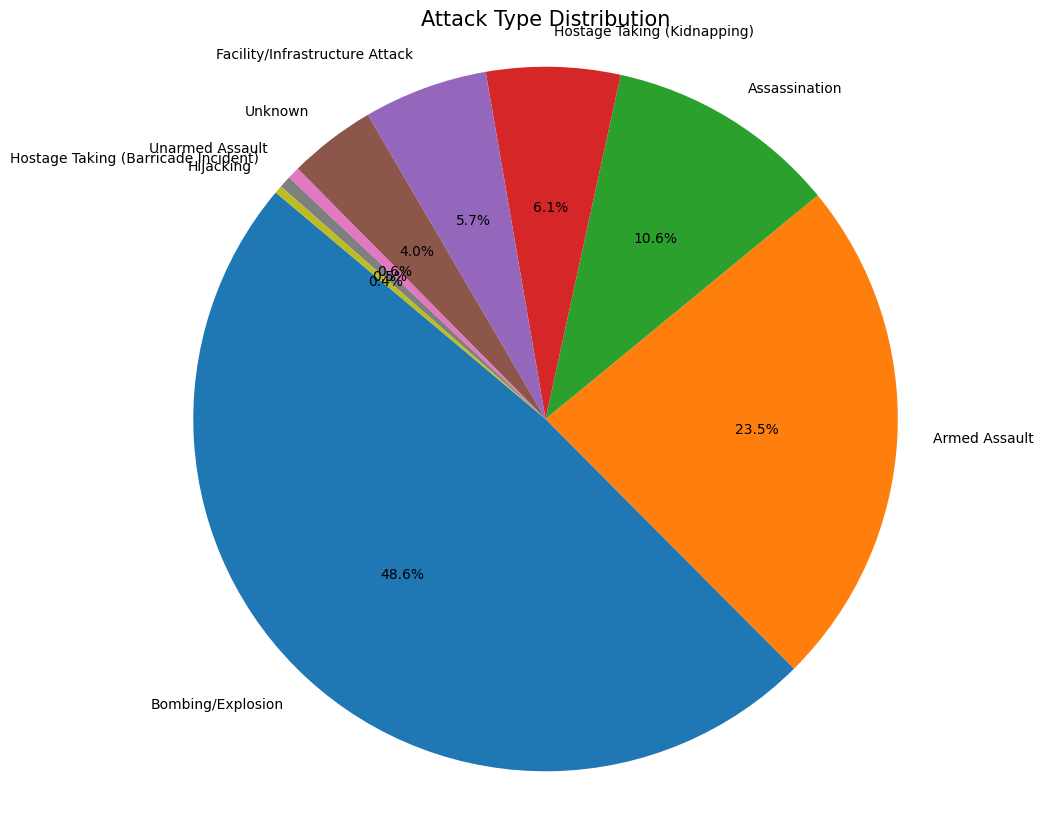

In [29]:
plt.figure(figsize=(10, 10))
plt.pie(attacktype, labels=attacktype.index, autopct='%1.1f%%', startangle=140)
plt.title("Attack Type Distribution", fontsize=15)
plt.axis('equal')
plt.show()